Lectura de archivo en excel con todas sus hojas

In [50]:
# Importar las librerías necesarias
import pandas as pd

# Especificar la ruta del archivo en "files"
file_path = '/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/subestacion _canaima _1000kva.xlsx'

# Cargar el archivo de Excel
excel_data = pd.ExcelFile(file_path)

# Ver las hojas del archivo de Excel
excel_data.sheet_names


['tension',
 'corriente',
 'energia',
 'Factor P',
 'Flickers (Pst)',
 'Flickers (Plt)',
 'Frecuencia',
 'potencia A',
 'Potencia Aparente',
 'potencia R I',
 'Distorsion armonica',
 'Armonicos  IL1',
 'Armonicos  IL2',
 'Armonicos  IL3',
 'Armonicos  VL1',
 'Armonicos  VL2',
 'Armonicos  VL3']

Consolidacion de datos es un solo data set por marca de tiempo

In [51]:
# Función para consolidar las hojas del Excel basadas en 'Fecha' y 'Tiempo'
def consolidate_sheets(excel_data, sheet_names):
    consolidated_df = None
    
    for sheet in sheet_names:
        sheet_df = excel_data.parse(sheet)
        
        # Combinar Fecha y Tiempo en una sola columna timestamp
        if 'Fecha' in sheet_df.columns and 'Tiempo' in sheet_df.columns:
            # Convertir 'Fecha' a string si es necesario
            if pd.api.types.is_datetime64_any_dtype(sheet_df['Fecha']):
                sheet_df['Fecha'] = sheet_df['Fecha'].dt.strftime('%Y-%m-%d')
            
            # Convertir 'Tiempo' a string si es de tipo datetime.time
            sheet_df['Tiempo'] = sheet_df['Tiempo'].apply(lambda x: x.strftime('%H:%M:%S') if isinstance(x, pd._libs.tslibs.timestamps.Timestamp) or isinstance(x, pd._libs.tslibs.nattype.NaTType) else x.strftime('%H:%M:%S'))
            
            # Crear la columna timestamp
            sheet_df['timestamp'] = pd.to_datetime(sheet_df['Fecha'] + ' ' + sheet_df['Tiempo'])
            sheet_df = sheet_df.drop(columns=['Fecha', 'Tiempo'])
        
        # Unir todas las hojas
        if consolidated_df is None:
            consolidated_df = sheet_df
        else:
            consolidated_df = pd.merge(consolidated_df, sheet_df, on='timestamp', how='outer')

    return consolidated_df

# Consolidar las hojas
sheet_names = excel_data.sheet_names
consolidated_data = consolidate_sheets(excel_data, sheet_names)

# Ver una muestra de los datos consolidados
print(consolidated_data.head())

# Guardar el DataFrame consolidado en un archivo Excel
output_excel_path = '/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/consolidated_data.xlsx'
consolidated_data.to_excel(output_excel_path, index=False)

print(f"Datos consolidados guardados en: {output_excel_path}")


   Tensión MIN: L1 (V)  Tensión: L1 (V)  Tensión MAX: L1 (V)  \
0               264.21           264.42               264.73   
1               264.37           264.73               264.93   
2               264.57           264.78               265.02   
3               264.54           264.77               265.00   
4               264.50           264.85               265.07   

   Tensión MIN: L2 (V)  Tensión: L2 (V)  Tensión MAX: L2 (V)  \
0               268.12           268.32               268.46   
1               268.42           268.59               268.80   
2               268.52           268.65               268.85   
3               268.29           268.60               268.88   
4               268.41           268.65               268.85   

   Tensión MIN: L3 (V)  Tensión: L3 (V)  Tensión MAX: L3 (V)  \
0               266.51           266.73               266.92   
1               266.69           266.98               267.20   
2               266.87           267.0

In [89]:
consolidated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Columns: 382 entries, Tensión MIN: L1 (V) to Armónicos VL3: Armónico 50 (%VL3)
dtypes: datetime64[ns](1), float64(111), int64(267), object(3)
memory usage: 20.8+ MB


Validacion de datos

In [53]:
# Validación de los datos consolidados

# 1. Verificar si hay valores faltantes
missing_data = consolidated_data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_data[missing_data > 0])

# 2. Verificar si hay registros duplicados basados en 'timestamp'
duplicates = consolidated_data.duplicated(subset='timestamp').sum()
print(f"\nNúmero de registros duplicados: {duplicates}")

# 3. Verificar los tipos de datos de las columnas
print("\nTipos de datos por columna:")
print(consolidated_data.dtypes)

# 4. Generar estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(consolidated_data.describe())


Valores faltantes por columna:
Series([], dtype: int64)

Número de registros duplicados: 0

Tipos de datos por columna:
Tensión MIN: L1 (V)                  float64
Tensión: L1 (V)                      float64
Tensión MAX: L1 (V)                  float64
Tensión MIN: L2 (V)                  float64
Tensión: L2 (V)                      float64
                                      ...   
Armónicos VL3: Armónico 46 (%VL3)      int64
Armónicos VL3: Armónico 47 (%VL3)      int64
Armónicos VL3: Armónico 48 (%VL3)      int64
Armónicos VL3: Armónico 49 (%VL3)      int64
Armónicos VL3: Armónico 50 (%VL3)      int64
Length: 382, dtype: object

Estadísticas descriptivas:
       Tensión MIN: L1 (V)  Tensión: L1 (V)  Tensión MAX: L1 (V)  \
count          7141.000000      7141.000000          7141.000000   
mean            264.445552       264.734348           265.000815   
min             257.010000       258.960000           259.320000   
25%             262.740000       263.040000           263.

In [54]:
import pandas as pd

# Carga el archivo de datos
file_path = '/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/consolidated_data.xlsx'
data = pd.read_excel(file_path)

# Muestra todas las columnas del archivo para verificación
print(data.columns.tolist())


['Tensión MIN: L1 (V)', 'Tensión: L1 (V)', 'Tensión MAX: L1 (V)', 'Tensión MIN: L2 (V)', 'Tensión: L2 (V)', 'Tensión MAX: L2 (V)', 'Tensión MIN: L3 (V)', 'Tensión: L3 (V)', 'Tensión MAX: L3 (V)', 'Tensión MIN: L1 - L2 (V)', 'Tensión: L1 - L2 (V)', 'Tensión MAX: L1 - L2 (V)', 'Tensión MIN: L2 - L3 (V)', 'Tensión: L2 - L3 (V)', 'Tensión MAX: L2 - L3 (V)', 'Tensión MIN: L3 - L1 (V)', 'Tensión: L3 - L1 (V)', 'Tensión MAX: L3 - L1 (V)', 'Tensión MIN: Trifásica (f-f) ~ (V)', 'Tensión: Trifásica (f-f) ~ (V)', 'Tensión MAX: Trifásica (f-f) ~ (V)', 'timestamp', 'Corriente MIN: L1 (A)', 'Corriente: L1 (A)', 'Corriente MAX: L1 (A)', 'Corriente MIN: L2 (A)', 'Corriente: L2 (A)', 'Corriente MAX: L2 (A)', 'Corriente MIN: L3 (A)', 'Corriente: L3 (A)', 'Corriente MAX: L3 (A)', 'Corriente MIN: In (A)', 'Corriente: In (A)', 'Corriente MAX: In (A)', 'Energías (Tarifa): Activa + (Total) (kWh)', 'Energías (Tarifa): Inductiva + (Total) (kvarh)', 'Energías (Tarifa): Aparente + (Total) (VAh)', 'Factor de pote

Basados en los criterios tecnicos de expertos, las variables eléctricas clave que pueden ser las más representativas:

Tensiones de línea y fase (Tensión L1, L2, L3, y sus mínimas y máximas):

Razón: La estabilidad y calidad del suministro eléctrico depende directamente de la tensión. Cualquier desviación significativa en las tensiones, especialmente si se sale de los rangos permitidos, puede indicar problemas en el sistema, como sobrecargas, desequilibrio de fases, o incluso falla en transformadores.
Importancia: Las tensiones fuera de los rangos normales pueden generar sobrecalentamiento o desbalance que impacta en la eficiencia y puede ser indicativo de fallas inminentes.

Corrientes de fase (Corriente L1, L2, L3):

Razón: Las corrientes reflejan directamente el consumo de energía y las cargas conectadas al sistema. Un incremento o fluctuación en las corrientes puede estar relacionado con sobrecargas, cortocircuitos o fallas en los equipos de la subestación.
Importancia: Es esencial monitorear estas corrientes para detectar cualquier sobrecarga que podría derivar en un fallo.

Potencias (Aparente, Activa, Reactiva):

Razón: La potencia activa (kW) es la que realmente realiza trabajo útil, mientras que la potencia reactiva (kVAR) es necesaria para mantener los campos eléctricos y magnéticos en los equipos. Un desbalance entre estos dos tipos de potencias puede indicar problemas en la eficiencia energética o fallas en los equipos que generen exceso de consumo de energía reactiva.
Importancia: El exceso de potencia reactiva puede sobrecargar los transformadores y sistemas de distribución, mientras que la potencia activa refleja el trabajo real. El monitoreo de la potencia total (aparente) permite observar posibles sobrecargas.

Factor de potencia (FP):

Razón: Un factor de potencia bajo significa que se está consumiendo una gran cantidad de potencia reactiva en comparación con la potencia activa, lo cual es ineficiente y puede causar sobrecargas en el sistema.
Importancia: Es un indicador importante de eficiencia. Valores bajos deben corregirse y pueden estar asociados a fallas en los equipos de corrección del factor de potencia, como los condensadores.

Distorsión armónica (THD) en tensión y corriente:

Razón: La distorsión armónica indica la presencia de armónicos (frecuencias no deseadas) en la señal de tensión o corriente, que pueden provenir de equipos electrónicos no lineales o cargas como motores de velocidad variable o rectificadores. Estos armónicos causan pérdidas adicionales y posibles fallas en los transformadores y otros equipos.
Importancia: Niveles elevados de distorsión armónica pueden generar un sobrecalentamiento en los transformadores, aumentar las pérdidas y reducir la vida útil del equipo.

Temperatura de los transformadores y equipos:

Razón: Los sistemas eléctricos se ven afectados por el calor, especialmente los transformadores, que pueden sobrecalentarse bajo carga. Monitorear la temperatura ayuda a prevenir fallas térmicas.
Importancia: Las temperaturas fuera de rango pueden indicar problemas como sobrecarga, aislamiento defectuoso o mal funcionamiento de los sistemas de enfriamiento.

Frecuencia del sistema:

Razón: La frecuencia debe mantenerse constante en el sistema de distribución (normalmente alrededor de 50 o 60 Hz, dependiendo de la región). Cambios significativos en la frecuencia pueden ser una indicación de desbalance entre generación y consumo, o problemas serios en el sistema.
Importancia: Una frecuencia fuera del rango normal puede causar problemas en equipos sensibles y reflejar fallas en el sistema de control de la subestación.

Variables secundarias que podrían no ser prioritarias:

Armónicos de órdenes superiores (> 15): Si bien los armónicos de orden bajo pueden tener mayor impacto, los de órdenes más altos (20, 30, 40, etc.) pueden no ser tan críticos para la predicción de fallas en subestaciones.

Variables de eventos específicos: Dependiendo del sistema, algunos eventos puntuales o picos pueden ser menos importantes si ocurren con poca frecuencia o no afectan el consumo energético general.

Conclusión:
Las variables que reflejan el comportamiento general del sistema eléctrico, como tensiones, corrientes, potencias, distorsión armónica y factor de potencia, son las más importantes para la predicción de fallas. Variables relacionadas con condiciones específicas, como armónicos de orden alto o eventos puntuales, podrían ser consideradas secundarias y podrían eliminarse o reducirse en el análisis.

In [90]:
import pandas as pd

# Ruta del archivo original
file_path = '/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/consolidated_data.xlsx'
data = pd.read_excel(file_path)

# Lista de columnas a conservar, ajustada según los nombres exactos en el archivo
columns_to_keep = [
    "Tensión: L1 (V)", "Tensión: L2 (V)", "Tensión: L3 (V)", "Tensión: L1 - L2 (V)", 
    "Tensión: L2 - L3 (V)", "Tensión: L3 - L1 (V)", "timestamp", "Corriente: L1 (A)", "Corriente: L2 (A)", 
    "Corriente: L3 (A)", "Factor de potencia: L1 +", "Factor de potencia: L2 +", 
    "Factor de potencia: L3 +", "Flicker (Pst): L1 (Pst)", "Flicker (Pst): L2 (Pst)", 
    "Flicker (Pst): L3 (Pst)", "Distorsión armónica: VL1 (%V THD)", 
    "Distorsión armónica: VL2 (%V THD)", "Distorsión armónica: VL3 (%V THD)", 
    "Distorsión armónica: IL1 (%I THD)", "Distorsión armónica: IL2 (%I THD)", 
    "Distorsión armónica: IL3 (%I THD)", "Armónicos IL1: Armónico 2 (%IL1)", 
    "Armónicos IL1: Armónico 3 (%IL1)", "Armónicos IL1: Armónico 4 (%IL1)", 
    "Armónicos IL1: Armónico 5 (%IL1)", "Armónicos IL1: Armónico 6 (%IL1)", 
    "Armónicos IL1: Armónico 7 (%IL1)", "Armónicos IL1: Armónico 8 (%IL1)", 
    "Armónicos IL1: Armónico 9 (%IL1)", "Armónicos IL1: Armónico 10 (%IL1)", 
    "Armónicos IL1: Armónico 11 (%IL1)", "Armónicos IL1: Armónico 12 (%IL1)", 
    "Armónicos IL1: Armónico 13 (%IL1)", "Armónicos IL1: Armónico 14 (%IL1)", 
    "Armónicos IL1: Armónico 15 (%IL1)", "Armónicos IL2: Armónico 2 (%IL2)", 
    "Armónicos IL2: Armónico 3 (%IL2)", "Armónicos IL2: Armónico 4 (%IL2)", 
    "Armónicos IL2: Armónico 5 (%IL2)", "Armónicos IL2: Armónico 6 (%IL2)", 
    "Armónicos IL2: Armónico 7 (%IL2)", "Armónicos IL2: Armónico 8 (%IL2)", 
    "Armónicos IL2: Armónico 9 (%IL2)", "Armónicos IL2: Armónico 10 (%IL2)", 
    "Armónicos IL2: Armónico 11 (%IL2)", "Armónicos IL2: Armónico 12 (%IL2)", 
    "Armónicos IL2: Armónico 13 (%IL2)", "Armónicos IL2: Armónico 14 (%IL2)", 
    "Armónicos IL2: Armónico 15 (%IL2)", "Armónicos VL1: Armónico 2 (%VL1)", 
    "Armónicos VL1: Armónico 3 (%VL1)", "Armónicos VL1: Armónico 4 (%VL1)", 
    "Armónicos VL1: Armónico 5 (%VL1)", "Armónicos VL1: Armónico 6 (%VL1)", 
    "Armónicos VL1: Armónico 7 (%VL1)", "Armónicos VL1: Armónico 8 (%VL1)", 
    "Armónicos VL1: Armónico 9 (%VL1)", "Armónicos VL1: Armónico 10 (%VL1)", 
    "Armónicos VL1: Armónico 11 (%VL1)", "Armónicos VL1: Armónico 12 (%VL1)", 
    "Armónicos VL1: Armónico 13 (%VL1)", "Armónicos VL1: Armónico 14 (%VL1)", 
    "Armónicos VL1: Armónico 15 (%VL1)", "Armónicos VL2: Armónico 2 (%VL2)", 
    "Armónicos VL2: Armónico 3 (%VL2)", "Armónicos VL2: Armónico 4 (%VL2)", 
    "Armónicos VL2: Armónico 5 (%VL2)", "Armónicos VL2: Armónico 6 (%VL2)", 
    "Armónicos VL2: Armónico 7 (%VL2)", "Armónicos VL2: Armónico 8 (%VL2)", 
    "Armónicos VL2: Armónico 9 (%VL2)", "Armónicos VL2: Armónico 10 (%VL2)", 
    "Armónicos VL2: Armónico 11 (%VL2)", "Armónicos VL2: Armónico 12 (%VL2)", 
    "Armónicos VL2: Armónico 13 (%VL2)", "Armónicos VL2: Armónico 14 (%VL2)", 
    "Armónicos VL2: Armónico 15 (%VL2)", "Armónicos VL3: Armónico 2 (%VL3)", 
    "Armónicos VL3: Armónico 3 (%VL3)", "Armónicos VL3: Armónico 4 (%VL3)", 
    "Armónicos VL3: Armónico 5 (%VL3)", "Armónicos VL3: Armónico 6 (%VL3)", 
    "Armónicos VL3: Armónico 7 (%VL3)", "Armónicos VL3: Armónico 8 (%VL3)", 
    "Armónicos VL3: Armónico 9 (%VL3)", "Armónicos VL3: Armónico 10 (%VL3)", 
    "Armónicos VL3: Armónico 11 (%VL3)", "Armónicos VL3: Armónico 12 (%VL3)", 
    "Armónicos VL3: Armónico 13 (%VL3)", "Armónicos VL3: Armónico 14 (%VL3)", 
    "Armónicos VL3: Armónico 15 (%VL3)"
]

# Filtrar solo las columnas especificadas
filtered_data = data[columns_to_keep]

# Guardar el archivo filtrado en la misma ubicación con un nuevo nombre
output_path = '/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_consolidated_data.xlsx'
filtered_data.to_excel(output_path, index=False)

print(f"Archivo guardado como {output_path}")



Archivo guardado como /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_consolidated_data.xlsx


In [92]:
filtered_data.head()

,Tensión: L1 (V),Tensión: L2 (V),Tensión: L3 (V),Tensión: L1 - L2 (V),Tensión: L2 - L3 (V),Tensión: L3 - L1 (V),timestamp,Corriente: L1 (A),Corriente: L2 (A),Corriente: L3 (A),...,Armónicos VL3: Armónico 6 (%VL3),Armónicos VL3: Armónico 7 (%VL3),Armónicos VL3: Armónico 8 (%VL3),Armónicos VL3: Armónico 9 (%VL3),Armónicos VL3: Armónico 10 (%VL3),Armónicos VL3: Armónico 11 (%VL3),Armónicos VL3: Armónico 12 (%VL3),Armónicos VL3: Armónico 13 (%VL3),Armónicos VL3: Armónico 14 (%VL3),Armónicos VL3: Armónico 15 (%VL3)
0,264.42,268.32,266.73,462.09,464.87,457.94,2013-05-04 16:07:00,477.28,566.28,564.68,...,0,1.0,0,0.0,0,0.2,0,0.0,0,0
1,264.73,268.59,266.98,462.57,465.30,458.48,2013-05-04 16:08:00,454.16,541.36,538.44,...,0,1.0,0,0.0,0,0.2,0,0.0,0,0
2,264.78,268.65,267.08,462.63,465.47,458.60,2013-05-04 16:09:00,449.76,537.60,534.96,...,0,1.0,0,0.0,0,0.2,0,0.0,0,0
3,264.77,268.60,267.08,462.60,465.41,458.60,2013-05-04 16:10:00,459.40,548.80,544.68,...,0,1.1,0,0.0,0,0.2,0,0.0,0,0
4,264.85,268.65,267.06,462.73,465.40,458.65,2013-05-04 16:11:00,463.12,551.08,547.12,...,0,1.2,0,0.0,0,0.1,0,0.0,0,0


Normalización de los datos y clustering con K-Means

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionar solo las columnas numéricas para normalizar
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[numerical_columns])

# Aplicar K-Means con un número de clusters, 
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(scaled_data)

# Agregar los resultados del clustering al dataframe consolidado
filtered_data['Cluster'] = kmeans_4.labels_

# Mostrar una muestra de los datos con los clusters asignados
print(filtered_data[['timestamp', 'Cluster']].head())
# Ver las primeras filas del DataFrame completo
print("Primeras filas del DataFrame:")
print(filtered_data.head())


            timestamp  Cluster
0 2013-05-04 16:07:00        2
1 2013-05-04 16:08:00        2
2 2013-05-04 16:09:00        2
3 2013-05-04 16:10:00        2
4 2013-05-04 16:11:00        2
Primeras filas del DataFrame:
   Tensión: L1 (V)  Tensión: L2 (V)  Tensión: L3 (V)  Tensión: L1 - L2 (V)  \
0           264.42           268.32           266.73                462.09   
1           264.73           268.59           266.98                462.57   
2           264.78           268.65           267.08                462.63   
3           264.77           268.60           267.08                462.60   
4           264.85           268.65           267.06                462.73   

   Tensión: L2 - L3 (V)  Tensión: L3 - L1 (V)           timestamp  \
0                464.87                457.94 2013-05-04 16:07:00   
1                465.30                458.48 2013-05-04 16:08:00   
2                465.47                458.60 2013-05-04 16:09:00   
3                465.41                

/tmp/ipykernel_5624/2108406152.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans_4.labels_


determinar el número óptimo de clusters:Método del Codo, Mide la suma de las distancias al centroide (inercia) y grafica esta métrica a medida que se aumenta el número de clusters. se busca un "codo" en la gráfica, donde agregar más clusters no mejora significativamente la inercia.

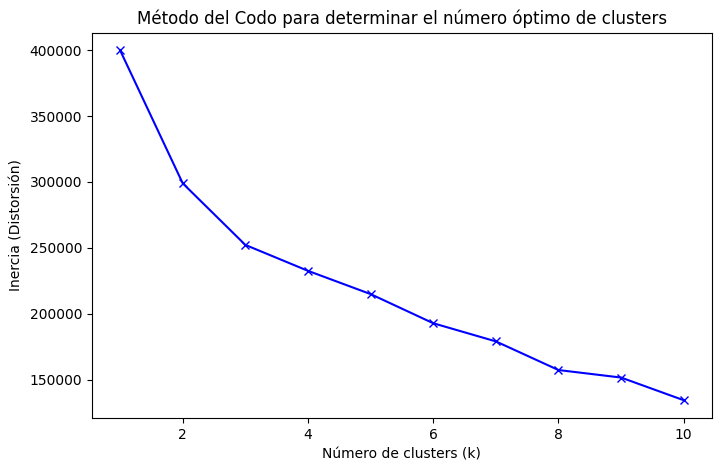

In [94]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Probar diferentes valores de k (número de clusters)
distortions = []
K = range(1, 11)  # Prueba desde 1 hasta 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)  # Guardar la inercia (distancia al centroide)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Distorsión)')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()

In [95]:
# Ver la distribución de los registros en los diferentes clusters
cluster_distribution = filtered_data['Cluster'].value_counts()

# Mostrar la cantidad de datos asignados a cada cluster
print("Distribución de los registros en los clusters:")
print(cluster_distribution)

Distribución de los registros en los clusters:
Cluster
3    2446
1    2258
0    1388
2    1049
Name: count, dtype: int64


Centroides de los Clusters

In [96]:
# Obtener los centroides del modelo K-Means con 4 clusters
centroids_4_clusters = kmeans_4.cluster_centers_

# Crear un DataFrame con los centroides y los nombres de las columnas
centroids_4_df = pd.DataFrame(centroids_4_clusters, columns=numerical_columns)

# Mostrar los centroides de los 4 clusters
print("Centroides de los 4 clusters:")
print(centroids_4_df)

Centroides de los 4 clusters:
   Tensión: L1 (V)  Tensión: L2 (V)  Tensión: L3 (V)  Tensión: L1 - L2 (V)  \
0         1.421970         1.433602         1.463998              1.431859   
1         0.215630         0.222320         0.189732              0.221747   
2        -0.242917        -0.240277        -0.323786             -0.237563   
3        -0.901785        -0.915694        -0.867045             -0.915340   

   Tensión: L2 - L3 (V)  Tensión: L3 - L1 (V)  Corriente: L1 (A)  \
0              1.455201              1.435688          -0.860489   
1              0.200373              0.206914          -0.320132   
2             -0.249710             -0.325353           2.035939   
3             -0.903645             -0.866169          -0.089323   

   Corriente: L2 (A)  Corriente: L3 (A)  Factor de potencia: L1 +  ...  \
0          -1.495105          -1.480550                  0.734033  ...   
1           0.219470           0.171962                 -0.355623  ...   
2           0.95

In [97]:
# Obtener estadísticas descriptivas por cluster
cluster_stats = filtered_data.groupby('Cluster')[numerical_columns].describe()

# Mostrar estadísticas por cluster
print("Estadísticas descriptivas por cluster:")
print(cluster_stats)

# Guardar las estadísticas en un archivo Excel
cluster_stats.to_excel("cluster_stats.xlsx")
print("Archivo 'cluster_stats.xlsx' creado exitosamente.")

Estadísticas descriptivas por cluster:
        Tensión: L1 (V)                                                   \
                  count        mean       std     min       25%      50%   
Cluster                                                                    
0                1388.0  268.224438  1.575491  264.37  266.8400  268.575   
1                2258.0  265.263592  1.229344  262.61  264.2500  265.120   
2                1049.0  264.138132  1.218922  261.03  263.2000  264.000   
3                2446.0  262.521002  1.388290  258.96  261.4825  262.555   

                          Tensión: L2 (V)              ...  \
              75%     max           count        mean  ...   
Cluster                                                ...   
0        269.5225  270.97          1388.0  273.227284  ...   
1        266.1300  269.07          2258.0  269.885837  ...   
2        265.1600  267.14          1049.0  268.609714  ...   
3        263.4500  266.18          2446.0  266.746504  .

visualización de clusters

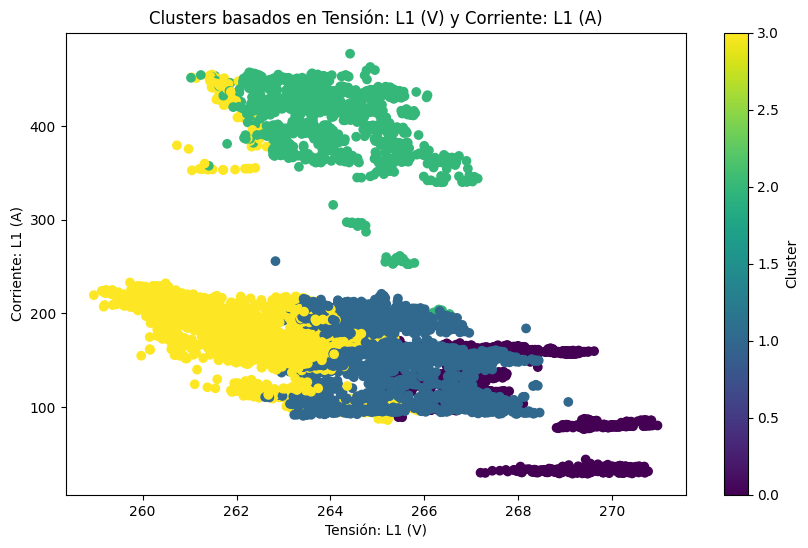

In [62]:
import matplotlib.pyplot as plt

# Seleccionar dos variables clave para visualizar
x_var = 'Tensión: L1 (V)'  # Variable en el eje X
y_var = 'Corriente: L1 (A)'  # Variable en el eje Y

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data[x_var], filtered_data[y_var], c=filtered_data['Cluster'], cmap='viridis')
plt.title('Clusters basados en {} y {}'.format(x_var, y_var))
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.colorbar(label='Cluster')
plt.show()

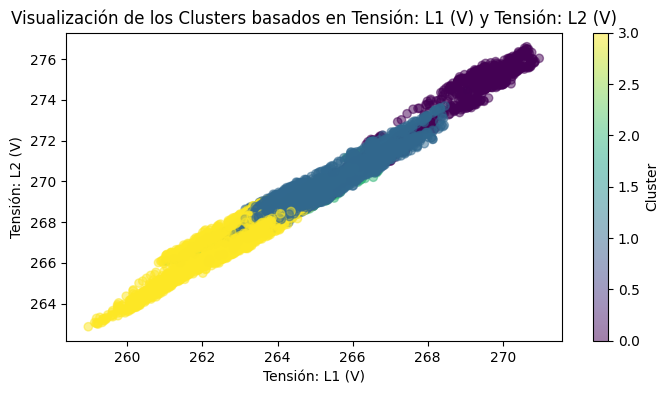

In [63]:
import matplotlib.pyplot as plt

# Seleccionar dos variables clave para visualizar
x_var = 'Tensión: L1 (V)'  # Variable en el eje X
y_var = 'Tensión: L2 (V)'  # Variable en el eje Y

# Graficar los clusters
plt.figure(figsize=(8, 4))
plt.scatter(filtered_data[x_var], filtered_data[y_var], c=filtered_data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualización de los Clusters basados en {} y {}'.format(x_var, y_var))
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.colorbar(label='Cluster')
plt.show()

In [64]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Coeficiente de Silueta: {silhouette_avg}")

Coeficiente de Silueta: 0.2940146982775572


 Al observar un coeficiente bajo, puede ser una señal de que los clusters están solapados y es difícil diferenciarlos.

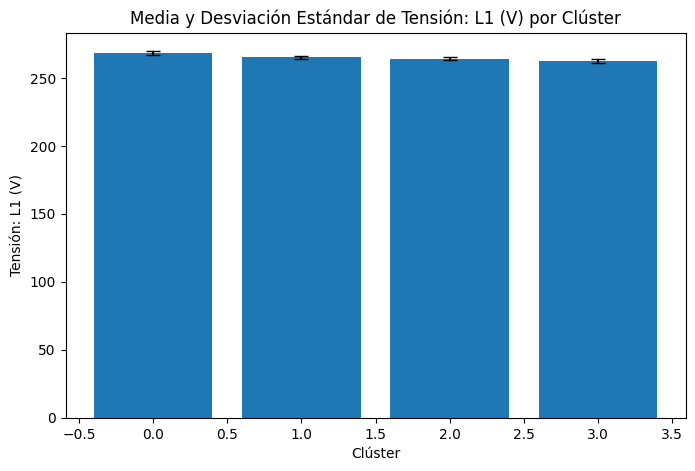

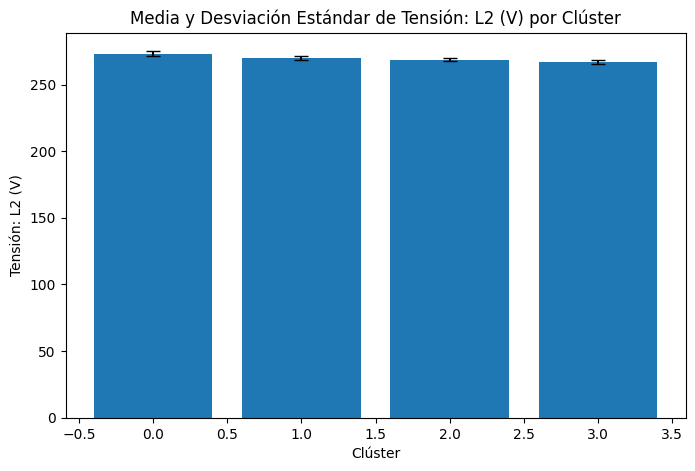

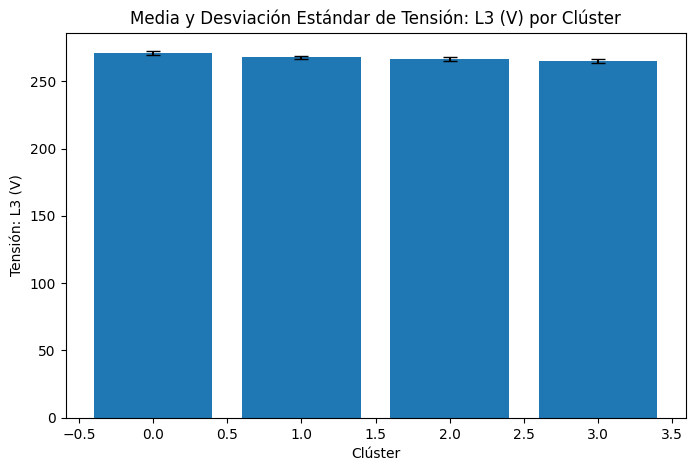

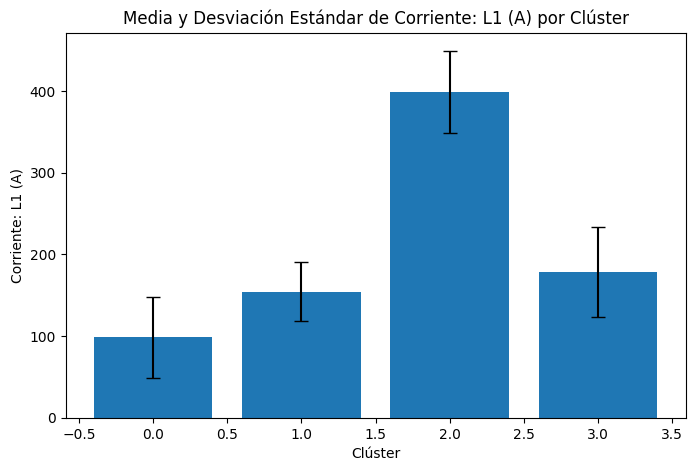

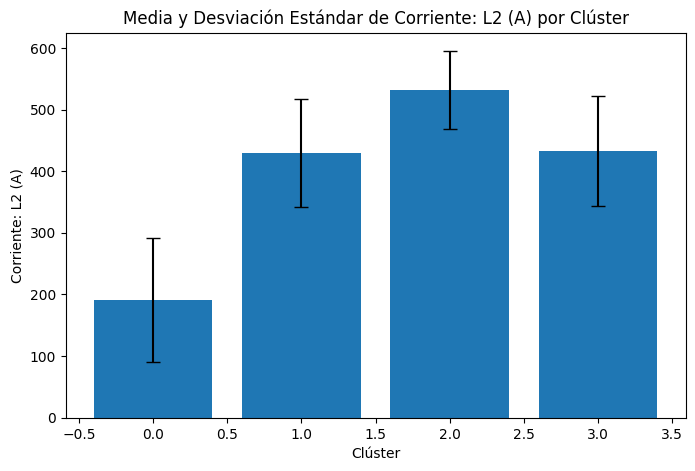

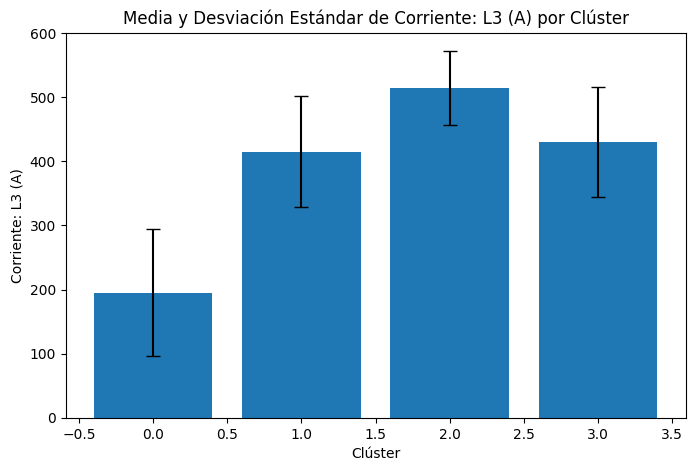

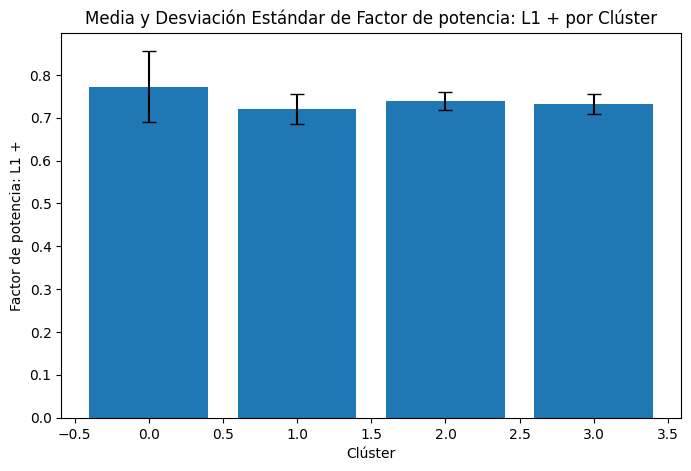

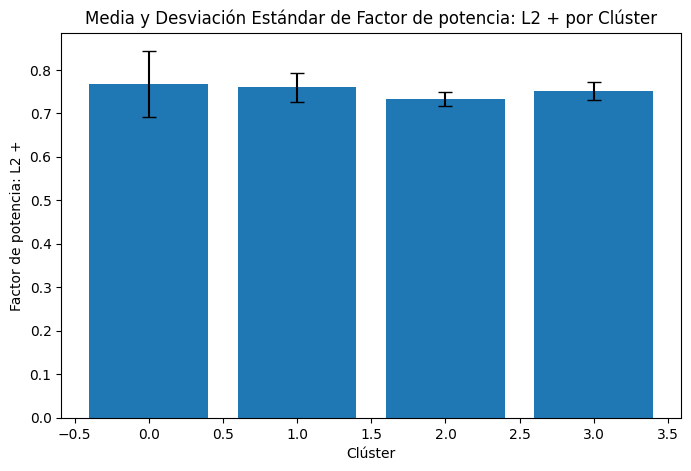

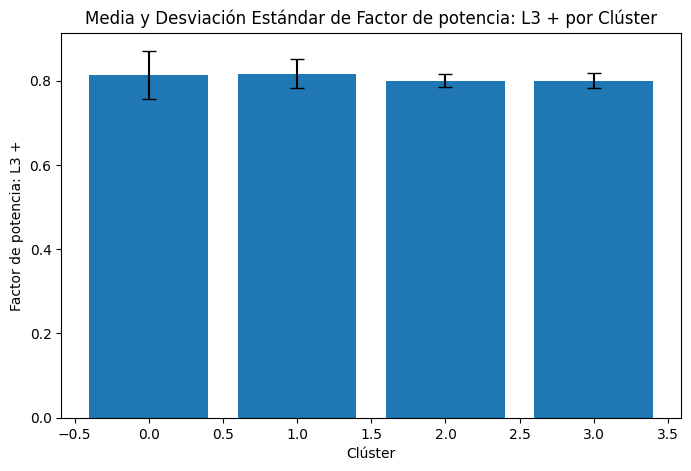

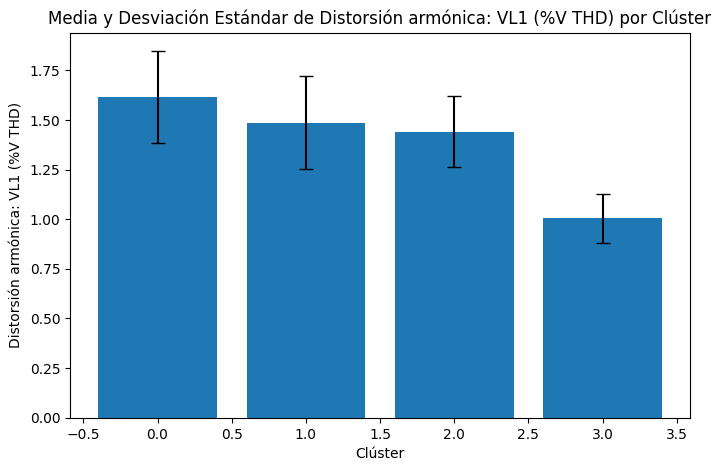

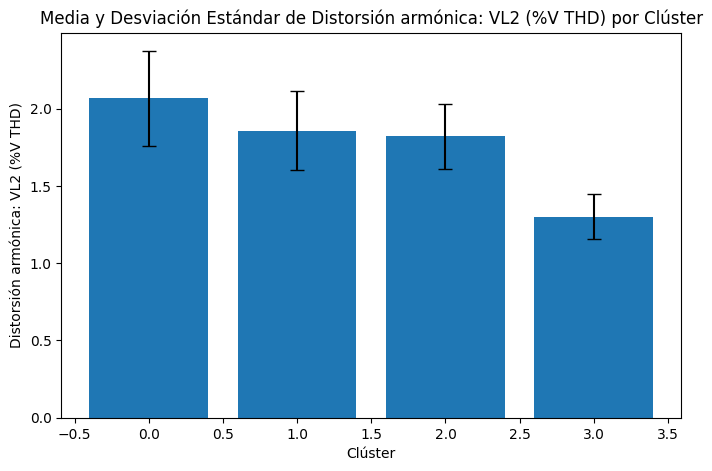

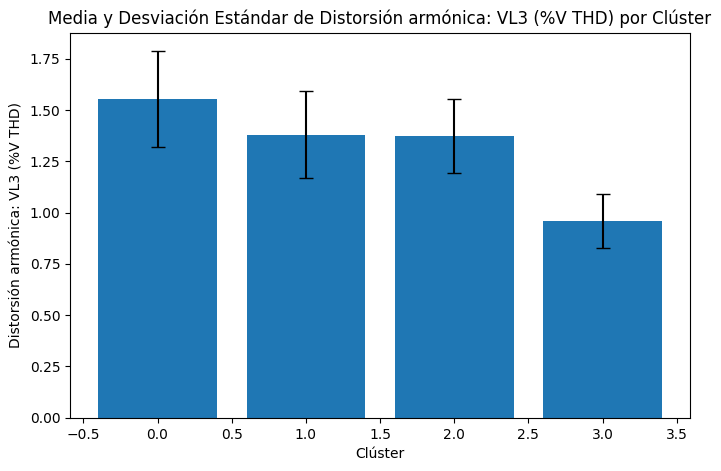

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de estadísticas de clústeres
cluster_stats_path = 'transformed_cluster_stats_fully_cleaned.xlsx'  # Coloca tu ruta local aquí
cluster_stats_df = pd.read_excel(cluster_stats_path)

# Filtrar las variables clave para el análisis
variables_clave = [
    "Tensión: L1 (V)", "Tensión: L2 (V)", "Tensión: L3 (V)",
    "Corriente: L1 (A)", "Corriente: L2 (A)", "Corriente: L3 (A)",
    "Factor de potencia: L1 +", "Factor de potencia: L2 +", "Factor de potencia: L3 +",
    "Distorsión armónica: VL1 (%V THD)", "Distorsión armónica: VL2 (%V THD)", "Distorsión armónica: VL3 (%V THD)"
]
filtered_stats_df = cluster_stats_df[cluster_stats_df['Variable'].isin(variables_clave)]

# Reestructurar el DataFrame para las gráficas
cluster_means = filtered_stats_df.pivot(index='Cluster', columns='Variable', values='mean')
cluster_stds = filtered_stats_df.pivot(index='Cluster', columns='Variable', values='std')

# Crear gráficos individuales para cada variable clave
for variable in variables_clave:
    plt.figure(figsize=(8, 5))
    plt.bar(cluster_means.index, cluster_means[variable], yerr=cluster_stds[variable], capsize=5)
    plt.title(f'Media y Desviación Estándar de {variable} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(variable)
    plt.show()



Hallazgos Clave por Variable
Tensión (L1, L2, L3):

Clúster 0 muestra los valores de tensión promedio más altos en todas las fases, con una desviación estándar baja, lo que indica una operación estable en alta tensión.
Clúster 3 tiene las tensiones promedio más bajas, especialmente en L1 (262.5V), lo que podría indicar condiciones de bajo voltaje. Esto puede ser un indicador de condiciones de carga pesada o posibles fallas.

Corriente (L1, L2, L3):

Clúster 2 tiene los valores de corriente promedio más altos en todas las fases (hasta 531.6A en L2), con desviaciones estándar relativamente moderadas. Este clúster podría estar representando condiciones de sobrecarga, lo cual es un factor de riesgo de falla.
Clúster 0 muestra las corrientes más bajas en todas las fases, lo que podría representar condiciones de carga ligera o inactividad.

Factor de Potencia:

Clúster 0 presenta los valores más altos de factor de potencia en todas las fases, especialmente en L3 (0.813). Esto indica un uso eficiente de la energía en este clúster.
Clúster 1 tiene valores de factor de potencia más bajos, lo cual sugiere una menor eficiencia energética en este grupo. Este comportamiento podría estar asociado con un aumento en las pérdidas o condiciones de operación ineficientes.

Distorsión Armónica (VL1, VL2, VL3):

Clúster 0 presenta los valores más altos de distorsión armónica en todas las fases, lo que podría ser un indicador de problemas de calidad de energía. La distorsión armónica es un posible indicador de problemas en el sistema que pueden llevar a fallas si no se corrigen.
Clúster 3 tiene las distorsiones armónicas más bajas, lo cual puede ser un indicador de mejor calidad de energía en este grupo.

Conclusiones Generales

Clúster 0 parece representar condiciones de alta tensión, baja corriente y un alto factor de potencia, pero con alta distorsión armónica. Esto sugiere una operación estable en cuanto a consumo, pero con posibles problemas de calidad de energía.
Clúster 2 muestra condiciones de alta corriente en todas las fases, lo cual puede indicar sobrecarga y un riesgo de falla en caso de que la corriente supere los límites seguros.
Clúster 3 tiene bajos valores de tensión y distorsión armónica, lo que sugiere buena calidad de energía, pero los bajos niveles de tensión podrían estar asociados a condiciones de carga alta o posibles fallas en el suministro.

distancias de los puntos a sus centroides

In [98]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Calcular las distancias de cada punto al centroide más cercano
# 'pairwise_distances_argmin_min' devuelve dos cosas: 
# 1. índice del centroide más cercano (ya lo tenemos en 'Cluster')
# 2. la distancia mínima de cada punto al centroide correspondiente
distances_to_centroids, _ = pairwise_distances_argmin_min(scaled_data, kmeans_4.cluster_centers_)

# Agregar las distancias al DataFrame
filtered_data['Distance_to_Centroid'] = distances_to_centroids

# Mostrar una muestra de los datos con las distancias añadidas
print(filtered_data[['timestamp', 'Cluster', 'Distance_to_Centroid']].head())

            timestamp  Cluster  Distance_to_Centroid
0 2013-05-04 16:07:00        2                     2
1 2013-05-04 16:08:00        2                     2
2 2013-05-04 16:09:00        2                     2
3 2013-05-04 16:10:00        2                     2
4 2013-05-04 16:11:00        2                     2


/tmp/ipykernel_5624/3555864148.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Distance_to_Centroid'] = distances_to_centroids


In [99]:
# Calcular el percentil 95 de las distancias
threshold_percentile = np.percentile(filtered_data['Distance_to_Centroid'], 95)

# Etiquetar como anomalías los puntos cuya distancia excede el percentil 95
filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > threshold_percentile

# Mostrar una muestra de los registros etiquetados como anomalías
print(filtered_data[filtered_data['Anomaly'] == True][['timestamp', 'Cluster', 'Distance_to_Centroid']].head())


Empty DataFrame
Columns: [timestamp, Cluster, Distance_to_Centroid]
Index: []


/tmp/ipykernel_5624/2571342945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > threshold_percentile


In [100]:
# Calcular la media y desviación estándar de las distancias
mean_distance = np.mean(filtered_data['Distance_to_Centroid'])
std_distance = np.std(filtered_data['Distance_to_Centroid'])

# Definir un umbral basado en 3 desviaciones estándar
threshold_std = mean_distance + 3 * std_distance

# Etiquetar como anomalías los puntos que exceden el umbral de desviación estándar
filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > threshold_std

# Mostrar una muestra de los registros etiquetados como anomalías
print(filtered_data[filtered_data['Anomaly'] == True][['timestamp', 'Cluster', 'Distance_to_Centroid']].head())


Empty DataFrame
Columns: [timestamp, Cluster, Distance_to_Centroid]
Index: []


/tmp/ipykernel_5624/3387398535.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > threshold_std


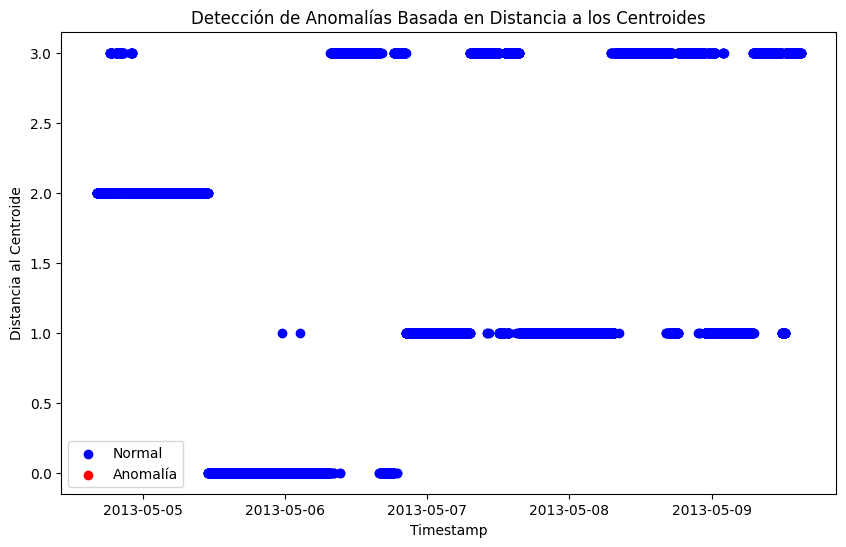

In [101]:
import matplotlib.pyplot as plt

# Visualizar las anomalías en función del tiempo y la distancia al centroide
plt.figure(figsize=(10, 6))

# Graficar los puntos normales
plt.scatter(filtered_data['timestamp'], filtered_data['Distance_to_Centroid'], 
            c='blue', label='Normal')

# Graficar los puntos anómalos
plt.scatter(filtered_data[filtered_data['Anomaly'] == True]['timestamp'], 
            filtered_data[filtered_data['Anomaly'] == True]['Distance_to_Centroid'], 
            c='red', label='Anomalía')

plt.xlabel('Timestamp')
plt.ylabel('Distancia al Centroide')
plt.title('Detección de Anomalías Basada en Distancia a los Centroides')
plt.legend()
plt.show()


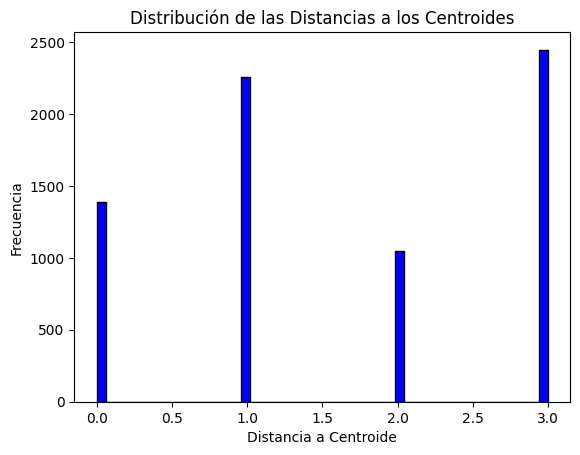

In [102]:
# Graficar un histograma de las distancias para ver la distribución
import matplotlib.pyplot as plt

plt.hist(filtered_data['Distance_to_Centroid'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de las Distancias a los Centroides')
plt.xlabel('Distancia a Centroide')
plt.ylabel('Frecuencia')
plt.show()

In [103]:
filtered_data.head()

,Tensión: L1 (V),Tensión: L2 (V),Tensión: L3 (V),Tensión: L1 - L2 (V),Tensión: L2 - L3 (V),Tensión: L3 - L1 (V),timestamp,Corriente: L1 (A),Corriente: L2 (A),Corriente: L3 (A),...,Armónicos VL3: Armónico 9 (%VL3),Armónicos VL3: Armónico 10 (%VL3),Armónicos VL3: Armónico 11 (%VL3),Armónicos VL3: Armónico 12 (%VL3),Armónicos VL3: Armónico 13 (%VL3),Armónicos VL3: Armónico 14 (%VL3),Armónicos VL3: Armónico 15 (%VL3),Cluster,Distance_to_Centroid,Anomaly
0,264.42,268.32,266.73,462.09,464.87,457.94,2013-05-04 16:07:00,477.28,566.28,564.68,...,0.0,0,0.2,0,0.0,0,0,2,2,False
1,264.73,268.59,266.98,462.57,465.30,458.48,2013-05-04 16:08:00,454.16,541.36,538.44,...,0.0,0,0.2,0,0.0,0,0,2,2,False
2,264.78,268.65,267.08,462.63,465.47,458.60,2013-05-04 16:09:00,449.76,537.60,534.96,...,0.0,0,0.2,0,0.0,0,0,2,2,False
3,264.77,268.60,267.08,462.60,465.41,458.60,2013-05-04 16:10:00,459.40,548.80,544.68,...,0.0,0,0.2,0,0.0,0,0,2,2,False
4,264.85,268.65,267.06,462.73,465.40,458.65,2013-05-04 16:11:00,463.12,551.08,547.12,...,0.0,0,0.1,0,0.0,0,0,2,2,False


In [104]:
# Usar la métrica Manhattan para calcular las distancias
from sklearn.metrics import pairwise_distances

manhattan_distances = pairwise_distances(scaled_data, kmeans_4.cluster_centers_, metric='manhattan')

# Usar la distancia mínima para detectar anomalías
filtered_data['Distance_to_Centroid'] = manhattan_distances.min(axis=1)

# Intentar de nuevo con el umbral basado en percentiles
threshold_percentile = np.percentile(filtered_data['Distance_to_Centroid'], 90)
filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > threshold_percentile

# Mostrar las posibles anomalías
print(filtered_data[filtered_data['Anomaly'] == True][['timestamp', 'Cluster', 'Distance_to_Centroid']].head())

              timestamp  Cluster  Distance_to_Centroid
633 2013-05-05 02:40:00        2            171.457573
764 2013-05-05 04:51:00        2             33.474767
814 2013-05-05 05:41:00        2             41.285609
816 2013-05-05 05:43:00        2             44.280326
818 2013-05-05 05:45:00        2             44.298111


/tmp/ipykernel_5624/2775677183.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Distance_to_Centroid'] = manhattan_distances.min(axis=1)
/tmp/ipykernel_5624/2775677183.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > threshold_percentile


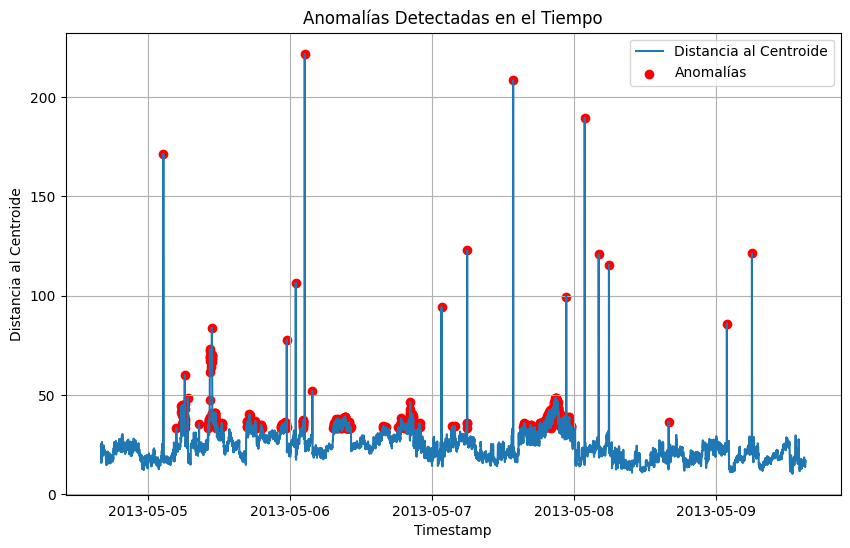

In [105]:
import matplotlib.pyplot as plt

# Filtrar los datos anómalos
anomalies = filtered_data[filtered_data['Anomaly'] == True]

# Visualizar las anomalías a lo largo del tiempo
plt.figure(figsize=(10, 6))

# Graficar todas las distancias
plt.plot(filtered_data['timestamp'], filtered_data['Distance_to_Centroid'], label='Distancia al Centroide')

# Resaltar las anomalías
plt.scatter(anomalies['timestamp'], anomalies['Distance_to_Centroid'], color='red', label='Anomalías')

plt.xlabel('Timestamp')
plt.ylabel('Distancia al Centroide')
plt.title('Anomalías Detectadas en el Tiempo')
plt.legend()
plt.grid(True)
plt.show()

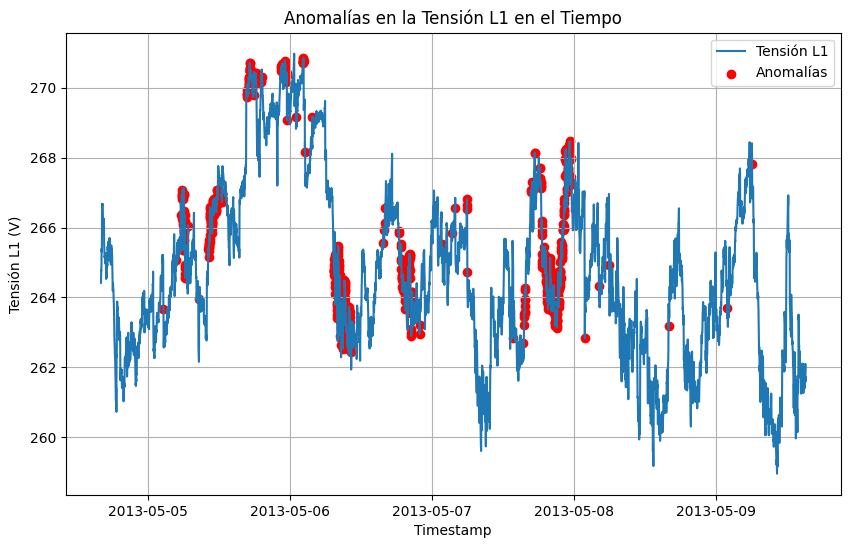

In [106]:
# Visualización de anomalías en relación con la Tensión L1
plt.figure(figsize=(10, 6))

# Graficar la Tensión L1 a lo largo del tiempo
plt.plot(filtered_data['timestamp'], filtered_data['Tensión: L1 (V)'], label='Tensión L1')

# Resaltar las anomalías
plt.scatter(anomalies['timestamp'], anomalies['Tensión: L1 (V)'], color='red', label='Anomalías')

plt.xlabel('Timestamp')
plt.ylabel('Tensión L1 (V)')
plt.title('Anomalías en la Tensión L1 en el Tiempo')
plt.legend()
plt.grid(True)
plt.show()

analisis de importancia de variables, Este enfoque permitirá identificar las variables que más contribuyen a la variabilidad y a la diferenciación de los clústeres, facilitando la selección de las variables que realmente influyen en las anomalías.

In [109]:
import pandas as pd
import numpy as np

# 1. Filtrar solo columnas numéricas para evitar errores con columnas de tipo datetime
numeric_columns = filtered_data.select_dtypes(include=[np.number]).columns

# 2. Calcular la varianza de cada variable en cada clúster
cluster_variance = {}
for cluster in filtered_data['Cluster'].unique():
    cluster_data = filtered_data[filtered_data['Cluster'] == cluster][numeric_columns]
    var_by_cluster = cluster_data.var()
    cluster_variance[cluster] = var_by_cluster

# Convertir el diccionario a un DataFrame para facilitar la visualización
cluster_variance_df = pd.DataFrame(cluster_variance)
cluster_variance_df['mean_variance'] = cluster_variance_df.mean(axis=1)
important_variables_by_variance = cluster_variance_df['mean_variance'].sort_values(ascending=False)

# 3. Crear `Cluster_numeric` como copia para evitar SettingWithCopyWarning
filtered_data = filtered_data.copy()
filtered_data['Cluster_numeric'] = filtered_data['Cluster'].astype(float)

# Crear lista de columnas numéricas con Cluster_numeric
numeric_columns_with_cluster = numeric_columns.tolist() + ['Cluster_numeric']

# Calcular la matriz de correlación completa
correlation_matrix = filtered_data[numeric_columns_with_cluster].corr()

# Extraer las correlaciones con `Cluster_numeric`, asegurando que sea una Serie para ordenar
if isinstance(correlation_matrix['Cluster_numeric'], pd.Series):
    correlations = correlation_matrix['Cluster_numeric'].drop(labels=['Cluster_numeric']).sort_values(ascending=False)
else:
    correlations = correlation_matrix['Cluster_numeric'].drop(index='Cluster_numeric').iloc[:, 0].sort_values(ascending=False)

# Crear un DataFrame final con los resultados
analysis_results = pd.DataFrame({
    'Variable': important_variables_by_variance.index,
    'Mean_Variance': important_variables_by_variance.values,
    'Correlation_with_Cluster': correlations.reindex(important_variables_by_variance.index, fill_value=np.nan)
})

# Exportar el DataFrame a un archivo Excel para análisis
output_path = 'analysis_results.xlsx'
analysis_results.to_excel(output_path, index=False)

print("Archivo Excel generado:", output_path)
print("\nVariables ordenadas por importancia (varianza media) y correlación con el clúster:")
print(analysis_results)


Archivo Excel generado: analysis_results.xlsx

Variables ordenadas por importancia (varianza media) y correlación con el clúster:
                                                            Variable  \
Corriente: L2 (A)                                  Corriente: L2 (A)   
Corriente: L3 (A)                                  Corriente: L3 (A)   
Corriente: L1 (A)                                  Corriente: L1 (A)   
Distance_to_Centroid                            Distance_to_Centroid   
Distorsión armónica: IL1 (%I THD)  Distorsión armónica: IL1 (%I THD)   
...                                                              ...   
Armónicos VL3: Armónico 10 (%VL3)  Armónicos VL3: Armónico 10 (%VL3)   
Armónicos VL3: Armónico 12 (%VL3)  Armónicos VL3: Armónico 12 (%VL3)   
Armónicos VL3: Armónico 14 (%VL3)  Armónicos VL3: Armónico 14 (%VL3)   
Armónicos VL3: Armónico 15 (%VL3)  Armónicos VL3: Armónico 15 (%VL3)   
Cluster                                                      Cluster   

     

Las variables de corriente (Corriente: L1 (A), Corriente: L2 (A), Corriente: L3 (A)) son las principales en las que deberíamos concentrarnos, ya que muestran alta variabilidad y alta correlación con los clústeres. Estas corrientes reflejan estados de carga y pueden indicar condiciones anormales directamente relacionadas con el rendimiento del sistema.

Las variables "Tensión: L1 - L2 (V)", "Tensión: L2 - L3 (V)", y "Tensión: L3 - L1 (V)" muestran una alta varianza y también tienen una correlación negativa significativa con la asignación de clústeres

Las tensiones de línea, especialmente en L1, L2 y L3, tienen correlaciones negativas elevadas (de -0.81 a -0.82) con los clústeres, lo cual es indicativo de que el comportamiento anómalo en el voltaje es un indicador directo de condiciones operativas anormales.

La alta varianza en estas variables, combinada con la fuerte correlación (aunque negativa), indica que estas tensiones pueden diferenciar estados operativos específicos.

Las diferencias de tensión entre fases (L1-L2, L2-L3, L3-L1) son indicativas de desbalances o fluctuaciones que pueden ser críticas para detectar condiciones operativas anómalas o potencialmente riesgosas.

Las diferencias de tensión entre fases (como Tensión: L2 - L3 y Tensión: L1 - L2) también presentan altas correlaciones negativas (de -0.82 a -0.83), señalando que fluctuaciones inusuales en estas diferencias de tensión pueden estar asociadas a escenarios de riesgo.

La alta correlación negativa sugiere que, en ciertos clústeres, el valor de estas tensiones es consistentemente más bajo o cambia en sentido opuesto al resto de variables. Esto podría indicar un patrón de desbalance de tensiones entre fases, que puede ser relevante para detectar anomalías operativas en condiciones específicas del sistema.



La distorsión armónica (Distorsión armónica: IL1 (%I THD)) es una medida que, aunque menos variable, tiene una correlación positiva con la asignación de clústeres y puede ayudar a diferenciar estados operativos cuando se combina con otras variables. Su análisis puede ser útil para identificar patrones de calidad de energía que contribuyen a condiciones de falla o inestabilidad.

Análisis Detallado de los Armónicos
Los armónicos de voltaje y distorsión armónica muestran características interesantes en términos de baja varianza y alta correlación negativa con la asignación de clústeres:

Las variables de distorsión armónica en voltajes, específicamente en VL1, VL2, y VL3 (%V THD), tienen una correlación negativa significativa (de -0.74 a -0.76). Esto sugiere que variaciones en la distorsión armónica del voltaje están altamente relacionadas con las condiciones operativas atípicas, lo que las convierte en indicadores relevantes para anomalías eléctricas.

Baja Varianza:

Los armónicos (Armónicos VL2: Armónico 5 (%VL2), Armónicos VL3: Armónico 5 (%VL3), etc.) y las distorsiones armónicas (Distorsión armónica: VL1 (%V THD), Distorsión armónica: VL3 (%V THD)) presentan varianzas en el rango bajo (0.026 - 0.041).
Esto indica que estas variables no cambian mucho entre los diferentes clústeres y pueden ser relativamente estables en la operación normal del sistema.
Alta Correlación Negativa con los Clústeres:

A pesar de su baja variabilidad, algunas de estas variables tienen una alta correlación negativa con los clústeres, con valores que van desde -0.75 hasta -0.36.
Esta alta correlación negativa sugiere que en ciertos clústeres, cuando los valores de estas variables tienden a ser bajos, están asociadas con estados específicos del sistema. La fuerte correlación negativa implica que estas variables tienen una relación inversa con la asignación de clústeres, lo cual podría ser indicativo de estados operativos particulares donde los armónicos se reducen.

 En el análisis que estamos realizando, estamos calculando la correlación de cada variable con la asignación de clústeres (representada por Cluster_numeric). Esto nos ayuda a identificar qué variables están más asociadas con la segmentación generada por el modelo de clustering, es decir, qué variables son más útiles para diferenciar los distintos grupos o estados del sistema.

Esta correlación no indica una relación causal entre las variables y el clúster, sino que nos ayuda a comprender qué variables tienen una mayor influencia en la formación de clústeres. En otras palabras, las variables con alta correlación con el clúster son aquellas que el modelo considera más relevantes para agrupar los datos en distintos estados operativos o patrones.

Las variables con mayor impacto en el agrupamiento de datos y, por lo tanto, en la identificación de patrones anómalos incluyen:

Corriente: L3 y L2 (A)
Distorsión armónica y armónicos del quinto orden en VL1, VL2, y VL3
Tensiones de línea L1, L2, y L3, así como las diferencias entre ellas (Tensión L1 - L2, etc.)



In [111]:
filtered_data.head()

,Tensión: L1 (V),Tensión: L2 (V),Tensión: L3 (V),Tensión: L1 - L2 (V),Tensión: L2 - L3 (V),Tensión: L3 - L1 (V),timestamp,Corriente: L1 (A),Corriente: L2 (A),Corriente: L3 (A),...,Armónicos VL3: Armónico 10 (%VL3),Armónicos VL3: Armónico 11 (%VL3),Armónicos VL3: Armónico 12 (%VL3),Armónicos VL3: Armónico 13 (%VL3),Armónicos VL3: Armónico 14 (%VL3),Armónicos VL3: Armónico 15 (%VL3),Cluster,Distance_to_Centroid,Anomaly,Cluster_numeric
0,264.42,268.32,266.73,462.09,464.87,457.94,2013-05-04 16:07:00,477.28,566.28,564.68,...,0,0.2,0,0.0,0,0,2,24.475505,False,2.0
1,264.73,268.59,266.98,462.57,465.30,458.48,2013-05-04 16:08:00,454.16,541.36,538.44,...,0,0.2,0,0.0,0,0,2,24.018323,False,2.0
2,264.78,268.65,267.08,462.63,465.47,458.60,2013-05-04 16:09:00,449.76,537.60,534.96,...,0,0.2,0,0.0,0,0,2,25.397913,False,2.0
3,264.77,268.60,267.08,462.60,465.41,458.60,2013-05-04 16:10:00,459.40,548.80,544.68,...,0,0.2,0,0.0,0,0,2,20.577149,False,2.0
4,264.85,268.65,267.06,462.73,465.40,458.65,2013-05-04 16:11:00,463.12,551.08,547.12,...,0,0.1,0,0.0,0,0,2,15.796565,False,2.0


Entrenamiento ARIMA Multivariable

Carga y Selección de Variables

In [123]:
# Definir las variables principales para el análisis
variables = [
    'Corriente: L1 (A)', 'Corriente: L2 (A)', 'Corriente: L3 (A)',
    'Tensión: L1 - L2 (V)', 'Tensión: L2 - L3 (V)', 'Tensión: L3 - L1 (V)',
    'Distorsión armónica: VL1 (%V THD)', 'Distorsión armónica: VL2 (%V THD)', 'Distorsión armónica: VL3 (%V THD)',
    'Armónicos VL2: Armónico 5 (%VL2)', 'Armónicos VL3: Armónico 5 (%VL3)',
    'Cluster', 'Distance_to_Centroid'
]

# Filtrar datos seleccionados
filtered_data = filtered_data[variables].dropna()  # Asegurar que no haya valores faltantes



Normalización de los Datos

In [124]:
from sklearn.preprocessing import StandardScaler

# Normalización excluyendo 'Cluster' y 'Distance_to_Centroid'
scaler = StandardScaler()
normalized_data = scaler.fit_transform(filtered_data.drop(columns=['Cluster', 'Distance_to_Centroid']))
normalized_df = pd.DataFrame(normalized_data, columns=variables[:-2])

# Añadir `Cluster` y `Distance_to_Centroid` sin normalizar
normalized_df['Cluster'] = filtered_data['Cluster'].values
normalized_df['Distance_to_Centroid'] = filtered_data['Distance_to_Centroid'].values



Modelado Híbrido ARIMA-LSTM: Usamos el modelo VAR (ARIMA multivariable) para capturar patrones lineales y luego un modelo LSTM para capturar patrones complejos.

In [126]:
from statsmodels.tsa.api import VAR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Entrenar el modelo VAR (ARIMA multivariable)
model_var = VAR(normalized_df.drop(columns=['Cluster', 'Distance_to_Centroid']))
model_var_fitted = model_var.fit()

# Generar predicciones de VAR
arima_predictions = model_var_fitted.forecast(
    normalized_df.drop(columns=['Cluster', 'Distance_to_Centroid']).values[-model_var_fitted.k_ar:], steps=10
)

# Preparar datos para LSTM
X_train, y_train = np.array(arima_predictions[:-1]), np.array(arima_predictions[1:])
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Ajustar dimensiones para LSTM

# Configuración y entrenamiento del modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


/home/elicoubuntu/Desktop/Industrial_Insigths/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.2297 - val_loss: 1.1750
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 1.1956 - val_loss: 1.1432
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 1.1632 - val_loss: 1.1122
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1.1317 - val_loss: 1.0823
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 1.1012 - val_loss: 1.0539
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 1.0723 - val_loss: 1.0272
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 1.0452 - val_loss: 1.0012
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0186 - val_loss: 0.9757
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.9927 - val_loss: 0.9509
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.9674 - val_loss: 0.9273
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.9434 - val_loss: 0.9042
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.9199 - val_loss:

Evaluación del Modelo y Visualización de Resultados
Calculamos métricas de evaluación y visualizamos los resultados.

Precisión: 1.0
F1-Score: 0.0


/home/elicoubuntu/Desktop/Industrial_Insigths/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


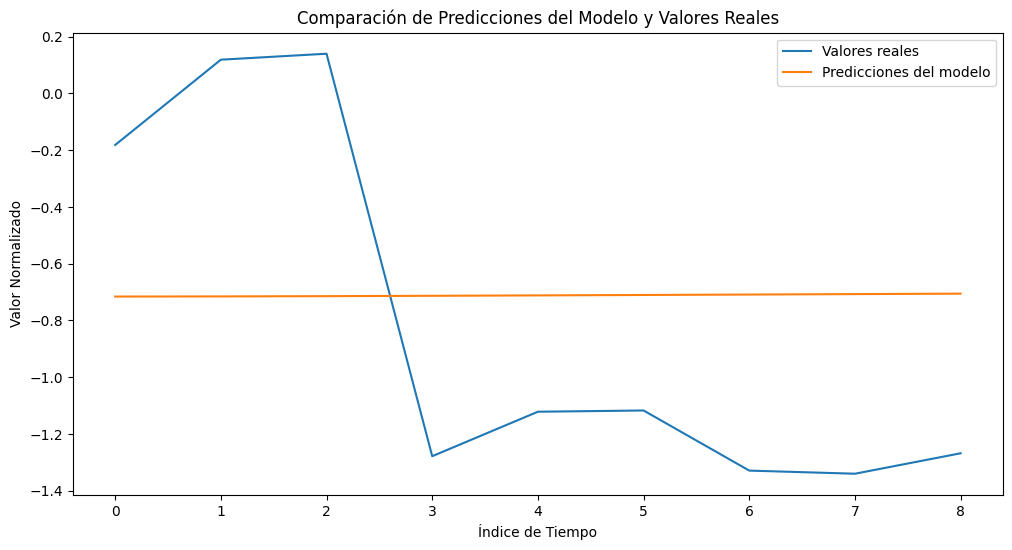

In [127]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Definir el umbral de clasificación
threshold = 0.5

# Convertir `y_test` y `y_pred` en binarios y asegurar que tengan el mismo tamaño
y_test_binary = (y_test.flatten()[:len(y_pred)] > threshold).astype(int)
y_pred_binary = (y_pred.flatten() > threshold).astype(int)

# Verificar si hay más de una clase en `y_test_binary` para calcular AUC-ROC
if len(np.unique(y_test_binary)) > 1:
    print("AUC-ROC:", roc_auc_score(y_test_binary, y_pred.flatten()))

# Calcular métricas de clasificación
print("Precisión:", accuracy_score(y_test_binary, y_pred_binary))
print("F1-Score:", f1_score(y_test_binary, y_pred_binary))

# Visualización de predicciones frente a valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test.flatten()[:len(y_pred)], label="Valores reales")
plt.plot(y_pred.flatten(), label="Predicciones del modelo")
plt.title("Comparación de Predicciones del Modelo y Valores Reales")
plt.xlabel("Índice de Tiempo")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.show()






/home/elicoubuntu/Desktop/Industrial_Insigths/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 632.2476 - val_loss: 408.3005
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 175.8382 - val_loss: 133.1382
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 79.7740 - val_loss: 101.3839
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 72.3514 - val_loss: 83.7240
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 66.6526 - val_loss: 75.7943
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 48.1708 - val_loss: 76.5910
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 51.7873 - val_loss: 73.3349
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 39.2774 - val_loss: 71.6272
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 40.3067 - val_loss: 70.2443
Epoch 10/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 74.0974 - val_loss: 70.5320
Epoch 11/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 50.6178 - val_loss: 69.5571
Epoc

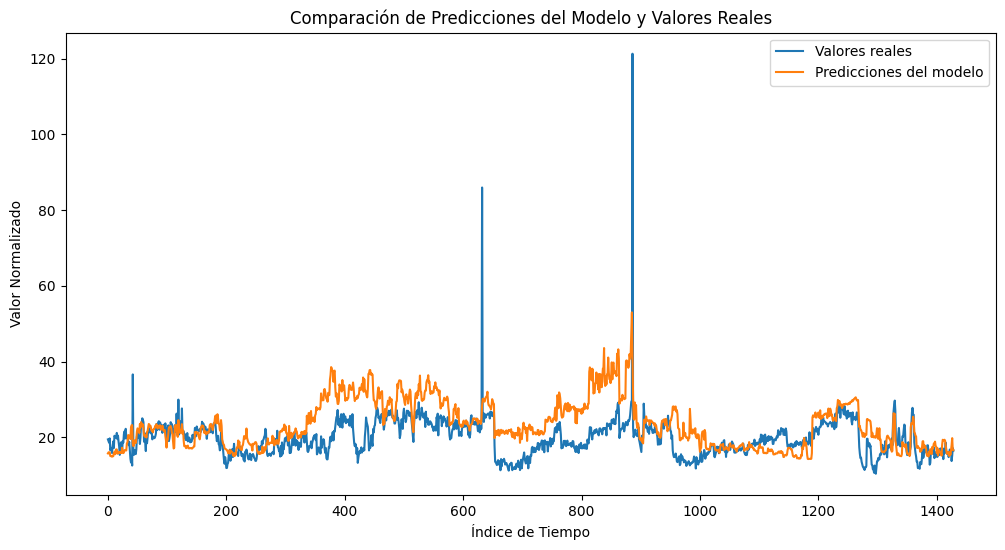

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Asegurarse de que los datos están normalizados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(filtered_data.drop(columns=['Cluster', 'Distance_to_Centroid']))
normalized_df = pd.DataFrame(normalized_data, columns=variables[:-2])
normalized_df['Cluster'] = filtered_data['Cluster'].values
normalized_df['Distance_to_Centroid'] = filtered_data['Distance_to_Centroid'].values

# Preparar los datos de entrenamiento y prueba para LSTM
X = np.array(normalized_df.drop(columns=['Cluster', 'Distance_to_Centroid']))
y = np.array(normalized_df['Distance_to_Centroid'])  # Usamos 'Distance_to_Centroid' como objetivo provisional
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Dividir en conjuntos de entrenamiento y prueba
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Configuración y entrenamiento del modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, activation='relu'))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
y_pred = model_lstm.predict(X_test)
threshold = 0.5
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred.flatten() > threshold).astype(int)

# Calcular métricas de evaluación
if len(np.unique(y_test_binary)) > 1:
    print("AUC-ROC:", roc_auc_score(y_test_binary, y_pred.flatten()))

print("Precisión:", accuracy_score(y_test_binary, y_pred_binary))
print("F1-Score:", f1_score(y_test_binary, y_pred_binary))

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Predicciones del modelo")
plt.title("Comparación de Predicciones del Modelo y Valores Reales")
plt.xlabel("Índice de Tiempo")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.show()


Incorporación de Resultados de Clustering y Anomalías

In [128]:
filtered_data.head()

,Corriente: L1 (A),Corriente: L2 (A),Corriente: L3 (A),Tensión: L1 - L2 (V),Tensión: L2 - L3 (V),Tensión: L3 - L1 (V),Distorsión armónica: VL1 (%V THD),Distorsión armónica: VL2 (%V THD),Distorsión armónica: VL3 (%V THD),Armónicos VL2: Armónico 5 (%VL2),Armónicos VL3: Armónico 5 (%VL3),Cluster,Distance_to_Centroid
0,477.28,566.28,564.68,462.09,464.87,457.94,1.4,1.7,1.3,0.9,0.7,2,24.475505
1,454.16,541.36,538.44,462.57,465.30,458.48,1.4,1.8,1.3,0.9,0.7,2,24.018323
2,449.76,537.60,534.96,462.63,465.47,458.60,1.4,1.8,1.3,0.9,0.7,2,25.397913
3,459.40,548.80,544.68,462.60,465.41,458.60,1.4,1.8,1.4,0.9,0.7,2,20.577149
4,463.12,551.08,547.12,462.73,465.40,458.65,1.5,1.8,1.4,0.8,0.6,2,15.796565


In [108]:
from scipy.spatial.distance import euclidean

# Agregar distancia al centroide como métrica de anomalía
filtered_data['Distance_to_Centroid'] = filtered_data.apply(
    lambda row: euclidean(row[variables], centroids[row['Cluster']]), axis=1
)


NameError: name 'centroids' is not defined

Normalizacion y cluster con 4

Centroides de los Clusters

Estadisticas por cluster

visualización de clusters

 Al observar un coeficiente bajo, puede ser una señal de que los clusters están solapados y es difícil diferenciarlos.

distancias de los puntos a sus centroides